In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as ocm
import gsw
import os
import sys
sys.path.append(os.environ.get('srcdir'))
from features.calc_z import calc_z

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
path = os.path.join(os.environ.get('rawdir'),'waom10_v2.0_small','ocean_avg_spinUp_0009.nc')
avg = xr.open_dataset(path)
grd_path = os.path.join(os.environ.get("intdir"),'waom10_grd_raw.nc')
grd = xr.open_dataset(grd_path)

In [3]:
def calc_R1(grd,ds):
    z,s,C = calc_z(grd.h.values,grd.zice.values,avg.theta_s.values,avg.theta_b.values,avg.hc.values,31)
    p = gsw.conversions.p_from_z(z,grd.lat_rho)
    SA = gsw.conversions.SA_from_SP(ds.salt,p,grd.lon_rho,grd.lat_rho)
    CT = gsw.conversions.CT_from_pt(SA,ds.temp)
    N_squared_mid,p_mid = gsw.stability.Nsquared(SA, CT, p, grd.lat_rho, axis=0)
    N_squared_mid[N_squared_mid<=0.0]=0.0
    dz = -(z[:-1]-z[1:])
    c1 = np.sum(np.sqrt(N_squared_mid)*dz,axis=0)/np.pi
    R1 = c1/np.abs(grd.f.values)
    
    return R1

In [4]:
avg['R1_summer'] = (['eta_rho','xi_rho'],calc_R1(grd,avg.isel(ocean_time=0)))
avg['R1_winter'] = (['eta_rho','xi_rho'],calc_R1(grd,avg.isel(ocean_time=6)))

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


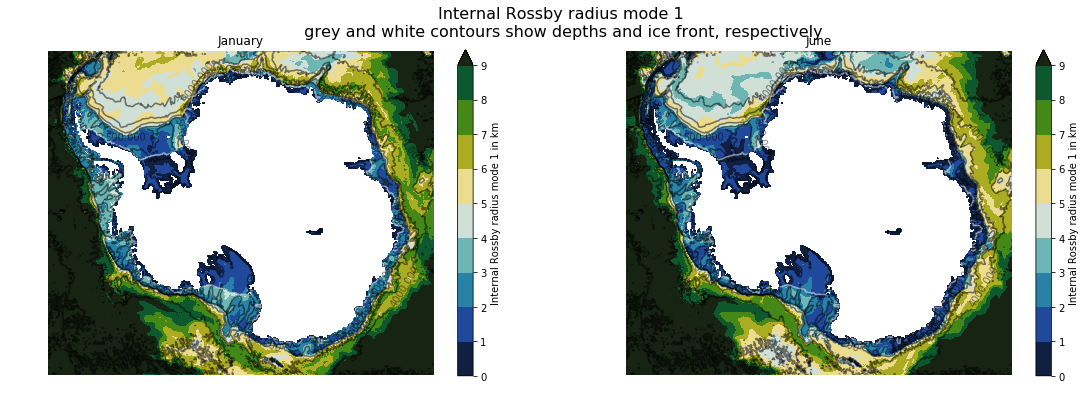

In [5]:
%matplotlib inline

plt.close()
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(19,6))
plt.suptitle('Internal Rossby radius mode 1'+
             '\n grey and white contours show depths and ice front, respectively',
             fontsize=16)    
CS_summer = (avg.R1_summer/1000).plot(levels=range(10),ax=ax1,add_colorbar=False,cmap=ocm.delta)

cbs = plt.colorbar(CS_summer,ax=ax1)
cbs.ax.set_ylabel('Internal Rossby radius mode 1 in km')
CS_winter = (avg.R1_winter/1000).plot(levels=range(10),ax=ax2,add_colorbar=False,cmap=ocm.delta)

cbw = plt.colorbar(CS_winter,ax=ax2)
cbw.ax.set_ylabel('Internal Rossby radius mode 1 in km')
for ax in [ax1,ax2]:
    ax.set_aspect('equal')
    ax.axis('off')
    depth = grd.h.where(grd.mask_rho).plot.contour(levels=[0,500,1000,2000,3000,4000,5000],ax=ax,colors='k',alpha=0.5)
    grd.zice.where(grd.mask_rho).plot.contour(levels=[-0.01],ax=ax,colors='white',alpha=0.5)
    plt.clabel(depth,inline = True,ax=ax)
ax1.set_title('January')
ax2.set_title('June')
#fig.tight_layout()
plt.show()

In [6]:
res = 1000
dist = np.sqrt(res**2+res*2)

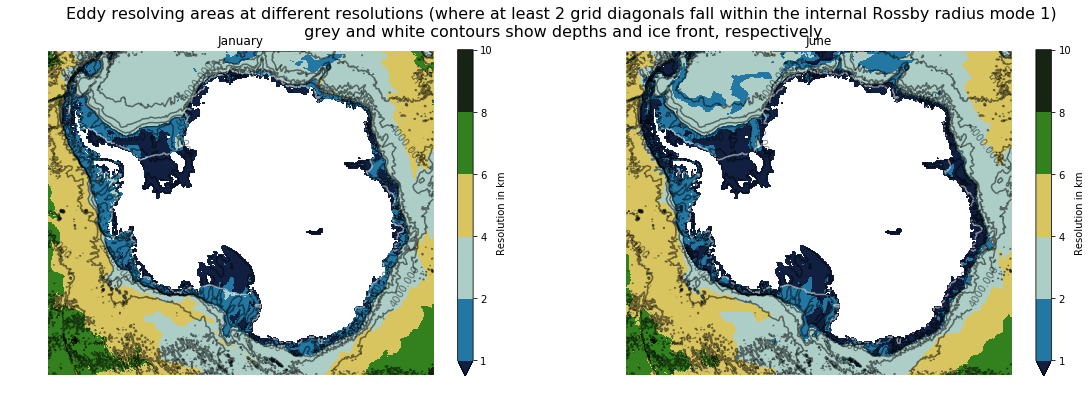

In [7]:
%matplotlib inline

plt.close()
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(19,6))
plt.suptitle('Eddy resolving areas at different resolutions (where at least 2 grid diagonals fall within the internal Rossby radius mode 1)'+
             '\n grey and white contours show depths and ice front, respectively',
             fontsize=16)    
CS_summer = (avg.R1_summer/(2*dist)).plot(levels=[1,2,4,6,8,10],ax=ax1,add_colorbar=False,cmap=ocm.delta)

cbs = plt.colorbar(CS_summer,ax=ax1)
cbs.ax.set_ylabel('Resolution in km')
CS_winter = (avg.R1_winter/(2*dist)).plot(levels=[1,2,4,6,8,10],ax=ax2,add_colorbar=False,cmap=ocm.delta)

cbw = plt.colorbar(CS_winter,ax=ax2)
cbw.ax.set_ylabel('Resolution in km')
for ax in [ax1,ax2]:
    ax.set_aspect('equal')
    ax.axis('off')
    depth = grd.h.where(grd.mask_rho).plot.contour(levels=[0,500,1000,2000,3000,4000,5000],ax=ax,colors='k',alpha=0.5)
    grd.zice.where(grd.mask_rho).plot.contour(levels=[-0.01],ax=ax,colors='white',alpha=0.5)
    plt.clabel(depth,inline = True,ax=ax)
ax1.set_title('January')
ax2.set_title('June')
#fig.tight_layout()
plt.show()

In [8]:
cbs(legen)

NameError: name 'legen' is not defined

In [ ]:
xr.plot.contour?

In [ ]:
dz = -(z[:-1]-z[1:])
c_1 = np.sum(np.sqrt(N_squared_mid)*dz,axis=0)/np.pi
R_1 = c_1/np.abs(grd.f.values)

In [ ]:
R_1